In [15]:
import numpy as np
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
pip install numpy pandas scikit-learn joblib matplotlib

In [16]:
# Step 1: Read data from output.txt
file_path = "../calibration/output.txt"
data = []

with open(file_path, "r") as file:
    for line in file:
        numbers = list(map(float, line.split()))
        data.append(numbers)

data = np.array(data)


In [17]:
# Function to remove outliers row-wise using IQR
def remove_outliers_iqr(data):
    filtered_data = []
    
    for row in data:
        Q1 = np.percentile(row, 25)
        Q3 = np.percentile(row, 75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Keep only values within bounds
        filtered_row = row[(row >= lower_bound) & (row <= upper_bound)]
        filtered_data.append(filtered_row)
    
    return filtered_data  # Returns a list of filtered rows with different lengths

filtered_data = remove_outliers_iqr(data)


In [18]:
# Step 2: Flatten data (Each data point is now independent)
features = []
labels = []

for category_label, category_data in enumerate(filtered_data):
    for value in category_data:
        features.append([value])
        labels.append(category_label-1)

# Convert to DataFrame
df = pd.DataFrame(features, columns=["Value"])
df["Category"] = labels

<Axes: >

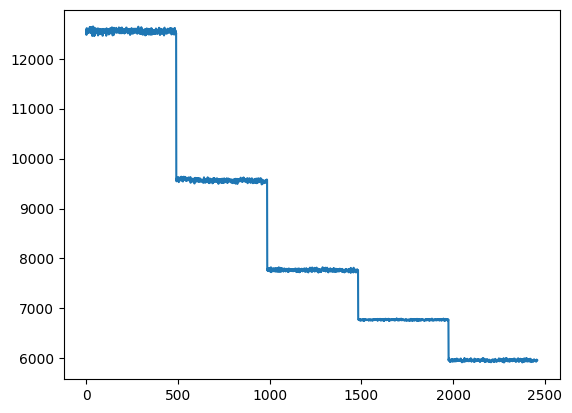

In [19]:
df['Value'].plot()

In [22]:
# Step 3: Train-Test Split
X = df.drop(columns=["Category"])
y = df["Category"]

# Split filtered data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
# Step 4: Normalize Features (Optional for Decision Tree)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Step 5: Train a Decision Tree
clf_dt = DecisionTreeClassifier(
    max_depth=5,             # Control depth
    random_state=42
)
# X = scaler.transform(X)


In [25]:
# X = scaler.transform(X)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

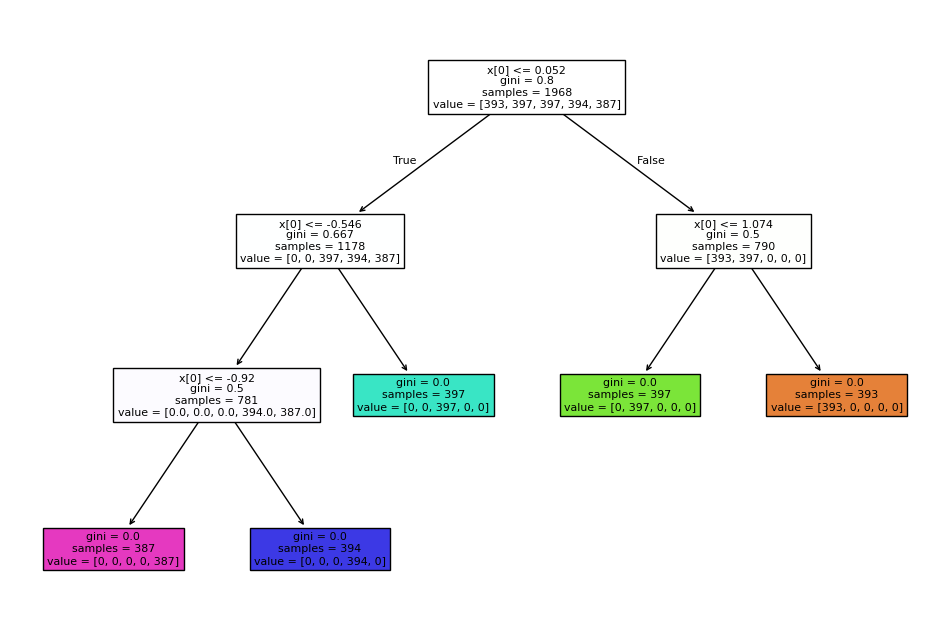

In [11]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf_dt, filled=True)
plt.show()

In [10]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:

model_path = "../models/dt_classifier_300_median_5.pkl"
scaler_path = "../models/scaler.pkl"

In [27]:

# Step 7: Save the Model
joblib.dump(clf_dt, model_path)
joblib.dump(scaler, scaler_path)
print("Model and scaler saved!")

Model and scaler saved!


##### Inference

In [10]:
import matplotlib.pyplot as plt
import joblib
import numpy as np

In [12]:
# Read test data from file
test_file = "../comm/received.txt"  # Your test data file
data = []

with open(test_file, "r") as file:
    for line in file:
        numbers = list(map(float, line.split()))  # Convert space-separated numbers to float
        data.extend(numbers)  # Flatten into one list

data = np.array(data).reshape(-1, 1)  # Convert to column vector

In [13]:
# Load model
# clf = joblib.load(model_path)
# scaler = joblib.load(scaler_path)

# Generate test values

data = scaler.transform(data)
# Predict
predictions = clf_dt.predict(data)


/home/arif/cs773_CompArch-Perf-Security/PA1/workspace/Occupancy/Approach-2/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
predictions


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  2,  2,  0,  1,  2,  1,  1,
        1,  2,  3,  0,  1,  2,  3,  0,  1,  2,  3,  3,  0,  2,  0,  0,  1,
        3,  1,  3,  1,  2,  3,  3,  1,  3,  0,  2,  1,  2,  3,  0,  1,  2,
        1,  0,  0,  2,  0,  1,  0,  2,  0,  0,  1,  0,  2,  1,  0,  2,  0,
        0,  1,  2,  3,  0,  1,  2,  3,  3,  1,  3,  1,  2,  1,  2,  1,  1,
        0,  2,  0,  0,  1,  2,  0,  3,  1,  3,  0,  3,  0,  3,  1,  3,  0,
        3,  1,  3,  0,  3,  0,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [79]:
data = []

with open(test_file, "r") as file:
    for line in file:
        numbers = list(map(float, line.split()))  # Convert space-separated numbers to float
        data.extend(numbers)  # Flatten into one list

data = np.array(data).reshape(-1, 1)  # Convert to column vector
np.set_printoptions(suppress=True)
paired = np.column_stack((data, predictions))
print(paired)

[[18370.    -1.]
 [18459.    -1.]
 [18408.    -1.]
 [18329.    -1.]
 [18155.    -1.]
 [18107.    -1.]
 [18191.    -1.]
 [18294.    -1.]
 [18324.    -1.]
 [18294.    -1.]
 [18277.    -1.]
 [18316.    -1.]
 [18304.    -1.]
 [18315.    -1.]
 [18315.    -1.]
 [18270.    -1.]
 [18302.    -1.]
 [13839.     1.]
 [11940.     2.]
 [11904.     2.]
 [14727.     0.]
 [13369.     1.]
 [11914.     2.]
 [13296.     1.]
 [13281.     1.]
 [13274.     1.]
 [11885.     2.]
 [ 9460.     3.]
 [14763.     0.]
 [13294.     1.]
 [11894.     2.]
 [ 9404.     3.]
 [14736.     0.]
 [13296.     1.]
 [11871.     2.]
 [ 9364.     3.]
 [ 9424.     3.]
 [14719.     0.]
 [11917.     2.]
 [14738.     0.]
 [14734.     0.]
 [13286.     1.]
 [ 9385.     3.]
 [13300.     1.]
 [ 9383.     3.]
 [13288.     1.]
 [11894.     2.]
 [ 9371.     3.]
 [ 9442.     3.]
 [13302.     1.]
 [ 9433.     3.]
 [14746.     0.]
 [11887.     2.]
 [13276.     1.]
 [11893.     2.]
 [ 9398.     3.]
 [14735.     0.]
 [13586.     1.]
 [11906.     2